# <div style="text-align: center;">Project 1: Data & Visualization</div>

In [2]:
# Packages
install.packages("tidyverse")
install.packages("ggrepel")
install.packages("ggcorrplot")
install.packages("DT")
install.packages("gridExtra")
install.packages("sf")
install.packages("modeest")
install.packages("factoextra")
install.packages("kableExtra")
install.packages("reshape2")
install.packages("knitr")
install.packages("caret")
install.packages("car")
install.packages("lubridate")

# Libraries
library("tidyverse")
library("ggrepel")
library("ggcorrplot")
library("DT")
library("gridExtra")
library("sf")
library("modeest")
library("knitr")
library("factoextra")
library("reshape2")
library("kableExtra")
library("knitr")
library("stringr")
library("caret")
library("car")
library("lubridate")


The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Linking to GEOS 3.13.0, GDAL 3.8.5, PROJ 9.5.1; sf_use_s2() is TRUE

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows


Loading req

In [4]:
# Define base directory
# base_dir <- "../../../../../../../Desktop/COVID-19/"
# base_dir <- "C:/Users/leona/OneDrive/CSMS/Data Mining (CS7331)/Projects/Project 1/COVID-19/"
base_dir <- "/Users/salissa/Desktop/Data Mining/Datasets/COVID-19"

# Use file.path() for better compatibility
global_mobility_path <- file.path(base_dir, "Global_Mobility_Report.csv")
covid_cases_census_path <- file.path(base_dir, "c19_census.csv")
covid_cases_tx_path <- file.path(base_dir, "c19_tx.csv")

In [6]:
# Custom function to read CSV files
read_data <- function(file_path, dataset_name) {
  if (file.exists(file_path)) {
    cat(paste0("\n--- Loading ", dataset_name, " ---\n"))
    # Suppress col_type messages
    return(read_csv(file_path, show_col_types = FALSE))
  } else {
    stop(paste0("Error: File not found -> ", file_path))
  }
}

# Load datasets
global_mobility <- read_data(global_mobility_path, "Global Mobility Data")
covid_cases_census <- read_data(covid_cases_census_path, "COVID-19 Cases and Census Data")
covid_cases_tx <- read_data(covid_cases_tx_path, "COVID-19 Cases for Texas")

cat("\n--- All datasets successfully loaded! ---\n")


--- Loading Global Mobility Data ---

--- Loading COVID-19 Cases and Census Data ---

--- Loading COVID-19 Cases for Texas ---

--- All datasets successfully loaded! ---


## 2.3 Covid Cases Texas

In [91]:
# Randomly display 10 rows
covid_cases_tx %>%
  sample_n(10)

county_fips_code,county_name,state,state_fips_code,date,confirmed_cases,deaths
<chr>,<chr>,<chr>,<dbl>,<date>,<dbl>,<dbl>
48051,Burleson County,TX,48,2020-08-13,248,6
48397,Rockwall County,TX,48,2020-12-01,2994,37
48097,Cooke County,TX,48,2020-02-12,0,0
48057,Calhoun County,TX,48,2020-09-19,626,7
48213,Henderson County,TX,48,2020-06-22,97,3
48411,San Saba County,TX,48,2020-03-09,0,0
48179,Gray County,TX,48,2020-09-24,295,6
48459,Upshur County,TX,48,2020-02-16,0,0
48421,Sherman County,TX,48,2020-05-15,21,0


In [92]:
# View of data
glimpse(covid_cases_tx)

Rows: 94,350
Columns: 7
$ county_fips_code <chr> "00000", "00000", "00000", "00000", "00000", "00000",…
$ county_name      <chr> "Statewide Unallocated", "Statewide Unallocated", "St…
$ state            <chr> "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX",…
$ state_fips_code  <dbl> 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 4…
$ date             <date> 2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020…
$ confirmed_cases  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ deaths           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…


In [93]:
# Rename columns for clarity and consistency
covid_cases_tx <- covid_cases_tx %>%
  select(
    county = county_name,
    state,
    date,
    cases = confirmed_cases,
    deaths
  )

In [94]:
# verify column name change
colnames(covid_cases_tx)

[1] "county" "state"  "date"   "cases"  "deaths"

In [95]:
#View the structure of the dataset
glimpse(covid_cases_tx)

Rows: 94,350
Columns: 5
$ county <chr> "Statewide Unallocated", "Statewide Unallocated", "Statewide Un…
$ state  <chr> "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX…
$ date   <date> 2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26, 20…
$ cases  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ deaths <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [96]:
# View the first few rows again to confirm changes
head(covid_cases_tx)

county,state,date,cases,deaths
<chr>,<chr>,<date>,<dbl>,<dbl>
Statewide Unallocated,TX,2020-01-22,0,0
Statewide Unallocated,TX,2020-01-23,0,0
Statewide Unallocated,TX,2020-01-24,0,0
Statewide Unallocated,TX,2020-01-25,0,0
Statewide Unallocated,TX,2020-01-26,0,0
Statewide Unallocated,TX,2020-01-27,0,0


In [97]:
# Convert categorical variables to factors and date to Date type
covid_cases_tx <- covid_cases_tx %>%
  mutate(
    county = as.factor(county),
    state = as.factor(state),
    date = as.Date(date)
  )

  # Display the filtered dataset
glimpse(covid_cases_tx)

# View the first few rows again to confirm changes
head(covid_cases_tx)

Rows: 94,350
Columns: 5
$ county <fct> Statewide Unallocated, Statewide Unallocated, Statewide Unalloc…
$ state  <fct> TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX,…
$ date   <date> 2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26, 20…
$ cases  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ deaths <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


county,state,date,cases,deaths
<fct>,<fct>,<date>,<dbl>,<dbl>
Statewide Unallocated,TX,2020-01-22,0,0
Statewide Unallocated,TX,2020-01-23,0,0
Statewide Unallocated,TX,2020-01-24,0,0
Statewide Unallocated,TX,2020-01-25,0,0
Statewide Unallocated,TX,2020-01-26,0,0
Statewide Unallocated,TX,2020-01-27,0,0


In [98]:
# Check for missing values in each column
missing_values <- covid_cases_tx %>%
  summarize(across(everything(), ~ sum(is.na(.)))) %>%
  pivot_longer(cols = everything(), names_to = "column", values_to = "missing_count") %>%
  mutate(missing_pct = (missing_count / nrow(covid_cases_tx)) * 100)

# View missing values summary
print(missing_values)

# Outcome
cat("Remaining rows after missing value removal:", nrow(covid_cases_tx), "\n")

# Check summary statistics of the cleaned dataset
summary(covid_cases_tx)

# A tibble: 5 × 3
  column missing_count missing_pct
  <chr>          <int>       <dbl>
1 county             0           0
2 state              0           0
3 date               0           0
4 cases              0           0
5 deaths             0           0
Remaining rows after missing value removal: 94350 


              county      state           date                cases         
 Anderson County :  370   TX:94350   Min.   :2020-01-22   Min.   :     0.0  
 Andrews County  :  370              1st Qu.:2020-04-23   1st Qu.:     1.0  
 Angelina County :  370              Median :2020-07-24   Median :    82.0  
 Aransas County  :  370              Mean   :2020-07-24   Mean   :  2158.6  
 Archer County   :  370              3rd Qu.:2020-10-25   3rd Qu.:   639.8  
 Armstrong County:  370              Max.   :2021-01-25   Max.   :297629.0  
 (Other)         :92130                                                     
     deaths       
 Min.   :   0.00  
 1st Qu.:   0.00  
 Median :   2.00  
 Mean   :  38.19  
 3rd Qu.:  15.00  
 Max.   :4024.00  
                  

In [99]:
# Identify duplicate rows
duplicates <- covid_cases_tx %>%
  filter(duplicated(.))

# Count duplicate rows
num_duplicates <- nrow(duplicates)

# View duplicate count
cat("Number of duplicate rows:", num_duplicates, "\n")

Number of duplicate rows: 0 


In [100]:
# Remove duplicates only if they exist
if (num_duplicates > 0) {
  covid_cases_tx <- covid_cases_tx %>%
    distinct()
  cat("Duplicates removed. New dataset size:", nrow(covid_cases_tx), "rows\n")
} else {
  cat("No duplicate rows found.\n")
}

No duplicate rows found.


In [101]:
# Define a function to count outliers using IQR
count_outliers <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  sum(x < (Q1 - 1.5 * IQR_value) | x > (Q3 + 1.5 * IQR_value), na.rm = TRUE)
}

# Create a summary table of outliers for COVID-19 case-related variables
outlier_summary <- covid_cases_tx %>%
  summarize(
    across(c(cases, deaths), count_outliers, .names = "{.col}_outliers")
  ) %>%
  pivot_longer(everything(), names_to = "Column", values_to = "Outlier_Count")

# Print the outlier summary table
print(outlier_summary, width=Inf)

# A tibble: 2 × 2
  Column          Outlier_Count
  <chr>                   <int>
1 cases_outliers          13401
2 deaths_outliers         13732


In [102]:
# Define a function to check if a value is NOT an outlier using IQR
is_not_outlier <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  x >= (Q1 - 1.5 * IQR_value) & x <= (Q3 + 1.5 * IQR_value)
}

# Remove rows containing outliers
covid_cases_tx_cleaned <- covid_cases_tx %>%
  filter(
    is_not_outlier(cases) &
    is_not_outlier(deaths)
  )

# Count how many rows were removed
rows_removed <- nrow(covid_cases_tx) - nrow(covid_cases_tx_cleaned)
cat("Number of rows removed due to outliers:", rows_removed, "\n")

Number of rows removed due to outliers: 15588 


In [103]:
# Stats after cleaning data
summary(covid_cases_tx_cleaned)

              county      state           date                cases       
 Aransas County  :  370   TX:78762   Min.   :2020-01-22   Min.   :   0.0  
 Archer County   :  370              1st Qu.:2020-04-08   1st Qu.:   0.0  
 Armstrong County:  370              Median :2020-06-27   Median :  31.0  
 Austin County   :  370              Mean   :2020-07-05   Mean   : 192.8  
 Bailey County   :  370              3rd Qu.:2020-09-27   3rd Qu.: 241.0  
 Bandera County  :  370              Max.   :2021-01-25   Max.   :1597.0  
 (Other)         :76542                                                   
     deaths     
 Min.   : 0.00  
 1st Qu.: 0.00  
 Median : 1.00  
 Mean   : 4.53  
 3rd Qu.: 6.00  
 Max.   :37.00  
                

In [104]:
# Verify rows, columns, data types
glimpse(covid_cases_tx_cleaned)

Rows: 78,762
Columns: 5
$ county <fct> Statewide Unallocated, Statewide Unallocated, Statewide Unalloc…
$ state  <fct> TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX,…
$ date   <date> 2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26, 20…
$ cases  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ deaths <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [105]:
# Function to compute key statistics
compute_stats <- function(data, variables) {
  data %>%
    summarize(across(
      all_of(variables),
      list(
        Range = ~ max(.x, na.rm = TRUE) - min(.x, na.rm = TRUE),
        Mode = ~ mfv(.x),
        Mean = ~ mean(.x, na.rm = TRUE),
        Median = ~ median(.x, na.rm = TRUE),
        Variance = ~ var(.x, na.rm = TRUE),
        SD = ~ sd(.x, na.rm = TRUE)
      ),
      .names = "{.col}_{.fn}"
    ))
}

# Define key variables for analysis
key_variables <- c("cases", "deaths")

# Compute statistics
stats_table <- compute_stats(covid_cases_tx_cleaned, key_variables)

# Convert to long format for better readability
stats_long <- stats_table %>%
  pivot_longer(
    cols = everything(),
    names_to = "Combined",
    values_to = "Value"
  ) %>%
  mutate(
    Variable = str_extract(Combined, "^[^_]+"), # Extract variable name
    Statistic = str_extract(Combined, "[^_]+$") # Extract statistic type
  ) %>%
  select(Variable, Statistic, Value) %>%
  pivot_wider(
    names_from = "Statistic",
    values_from = "Value"
  ) %>%
  mutate(across(where(is.list), ~ map_dbl(.x, ~ .x[1])))

# Print the formatted table
kable(stats_long, digits = 2, caption = "Summary Statistics for COVID-19 Cases and Deaths")



Table: Summary Statistics for COVID-19 Cases and Deaths

|Variable | Range| Mode|   Mean| Median|  Variance|     SD|
|:--------|-----:|----:|------:|------:|---------:|------:|
|cases    |  1597|    0| 192.81|     31| 101777.21| 319.03|
|deaths   |    37|    0|   4.53|      1|     58.49|   7.65|

[9 points]
- Visually explore the chosen attributes appropriately. 
- Provide an interpretation for each graph. 
- Explain why you chose the visualization for each attribute type. 



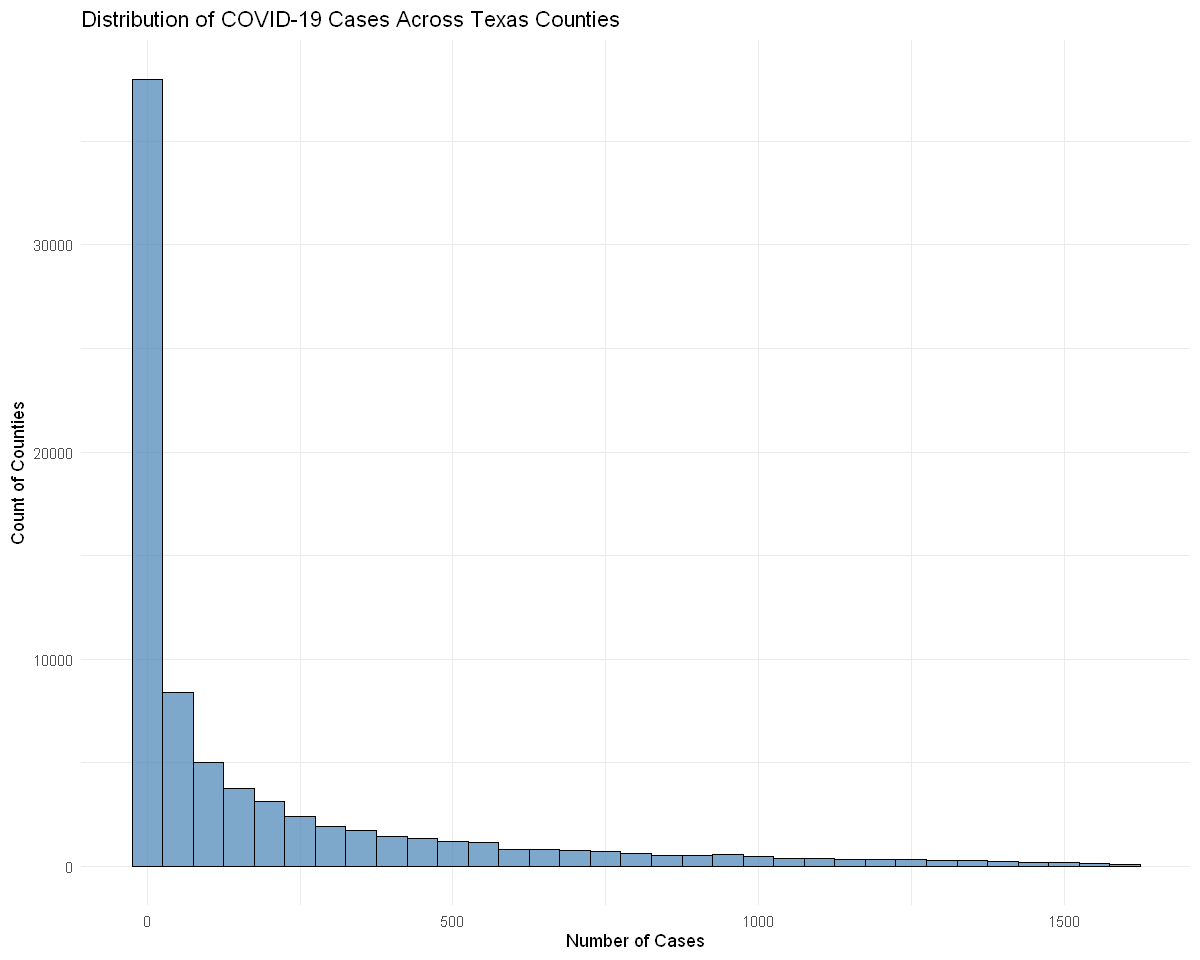

In [106]:
# Distribution of COVID-19 Cases
ggplot(covid_cases_tx_cleaned, aes(x = cases)) +
  geom_histogram(binwidth = 50, fill = "steelblue", color = "black", alpha = 0.7) +
  labs(title = "Distribution of COVID-19 Cases Across Texas Counties",
       x = "Number of Cases", 
       y = "Count of Counties") +
  theme_minimal()


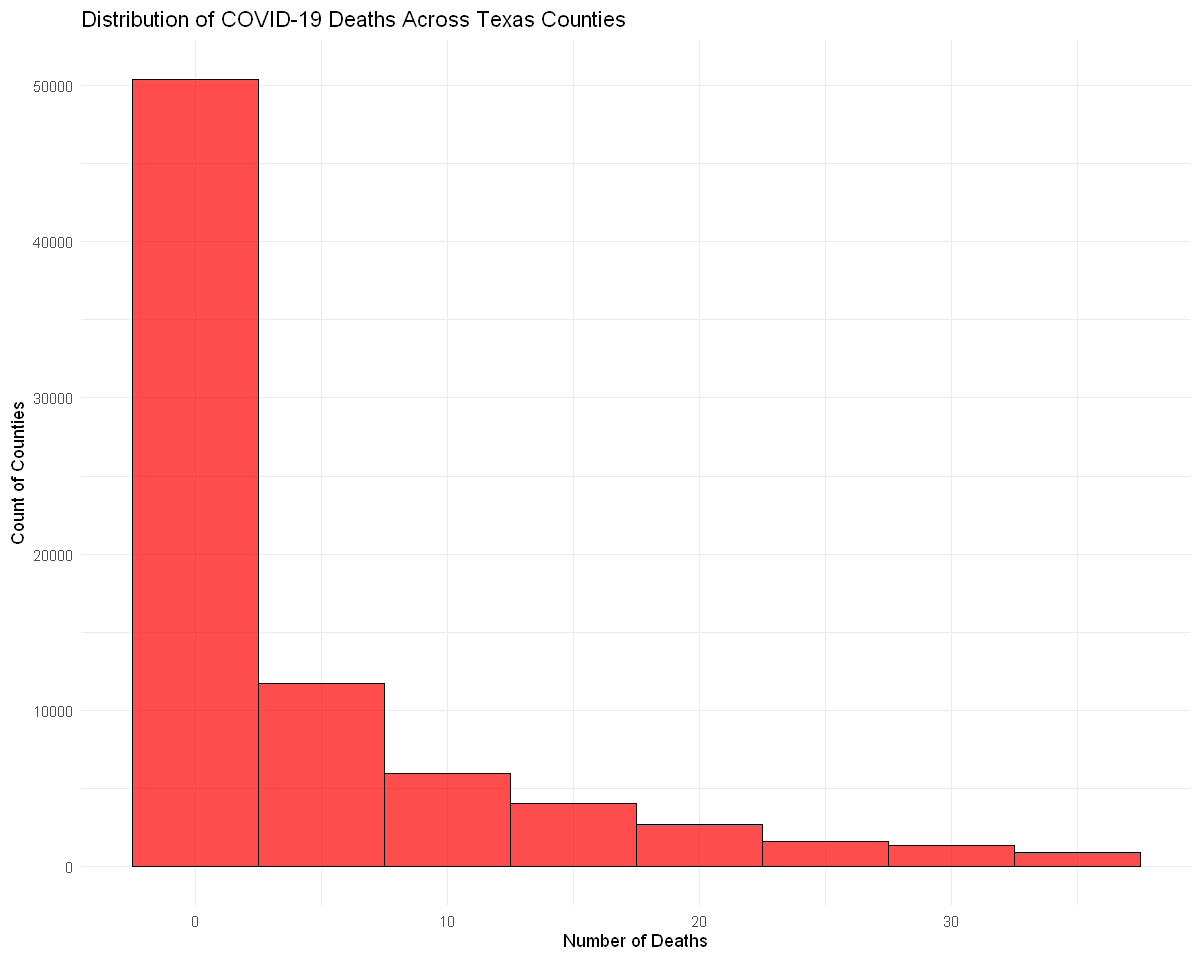

In [107]:
# Distribution of COVID-19 Deaths
ggplot(covid_cases_tx_cleaned, aes(x = deaths)) +
  geom_histogram(binwidth = 5, fill = "red", color = "black", alpha = 0.7) +
  labs(title = "Distribution of COVID-19 Deaths Across Texas Counties",
       x = "Number of Deaths", 
       y = "Count of Counties") +
  theme_minimal()

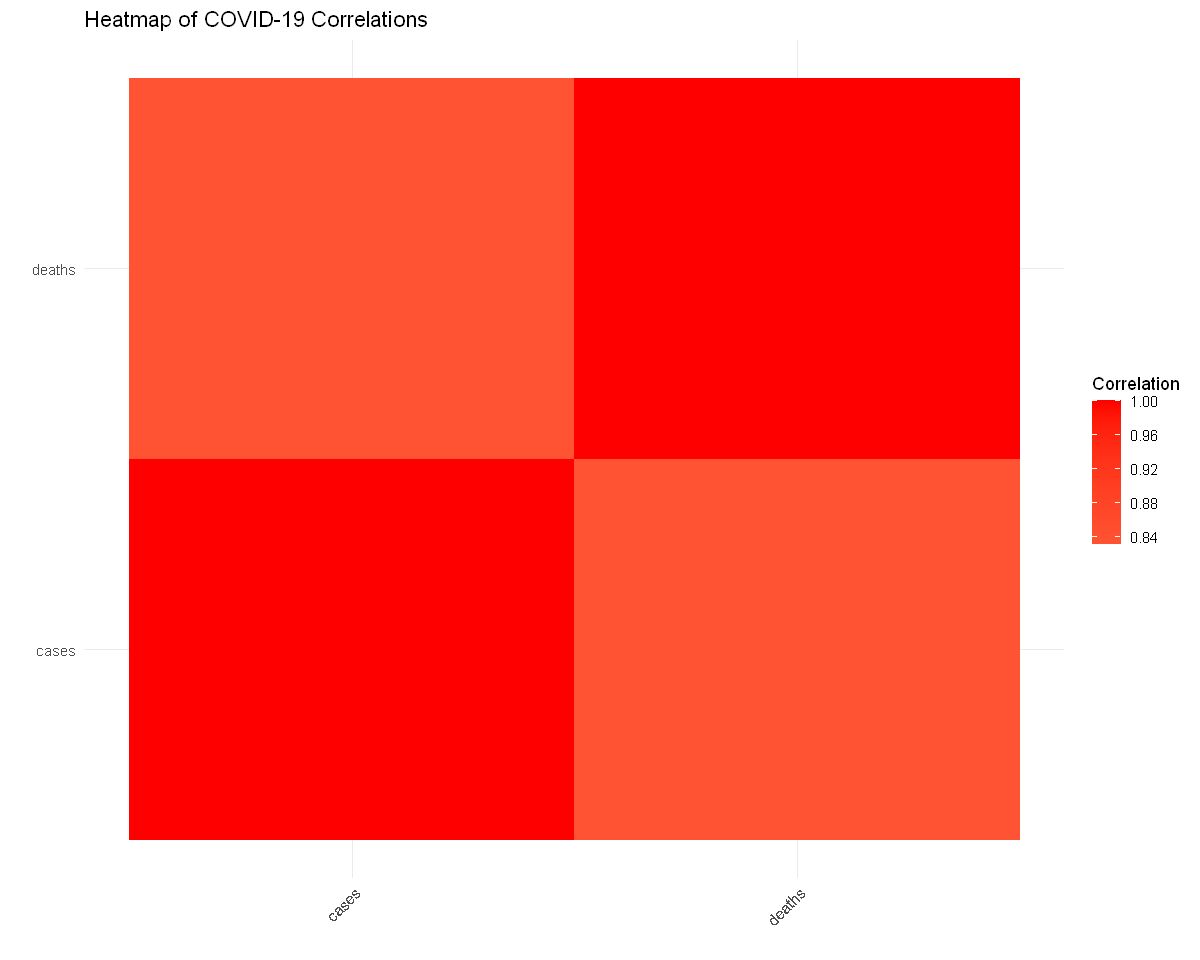

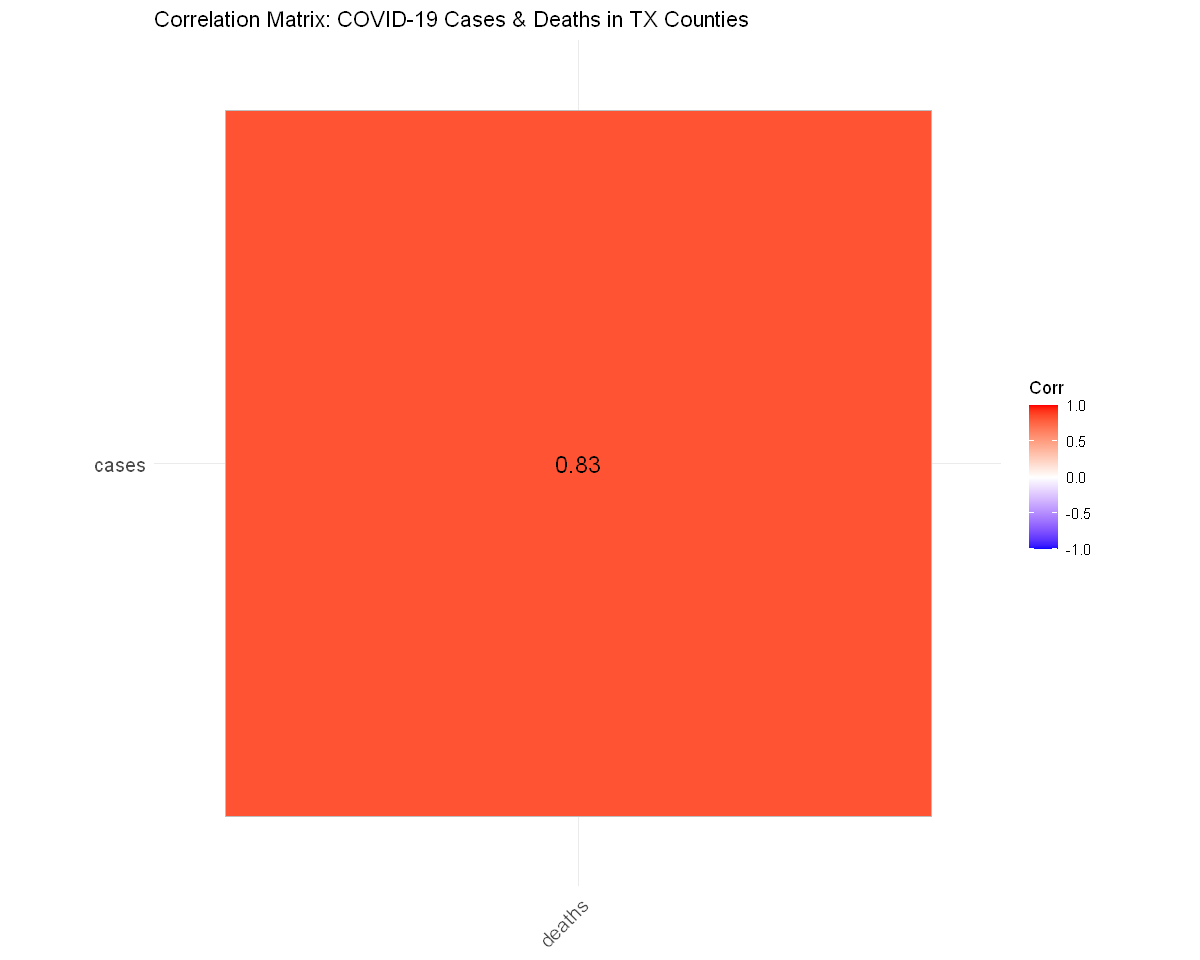

In [108]:
# Select relevant columns for correlation analysis (ONLY using 2.3 dataset columns)
covid_vars <- covid_cases_tx_cleaned %>%
  select(cases, deaths)

# Compute correlation matrix
cor_matrix <- cor(covid_vars, use = "complete.obs")

# Convert correlation matrix to long format for heatmap
heatmap_melted <- melt(cor_matrix)

# Plot correlation heatmap
ggplot(heatmap_melted, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  labs(title = "Heatmap of COVID-19 Correlations",
       x = "", y = "", fill = "Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Plot correlation matrix with numerical values
ggcorrplot(cor_matrix, method = "square", type = "lower", lab = TRUE,
           colors = c("blue", "white", "red"),
           title = "Correlation Matrix: COVID-19 Cases & Deaths in TX Counties",
           lab_size = 5)


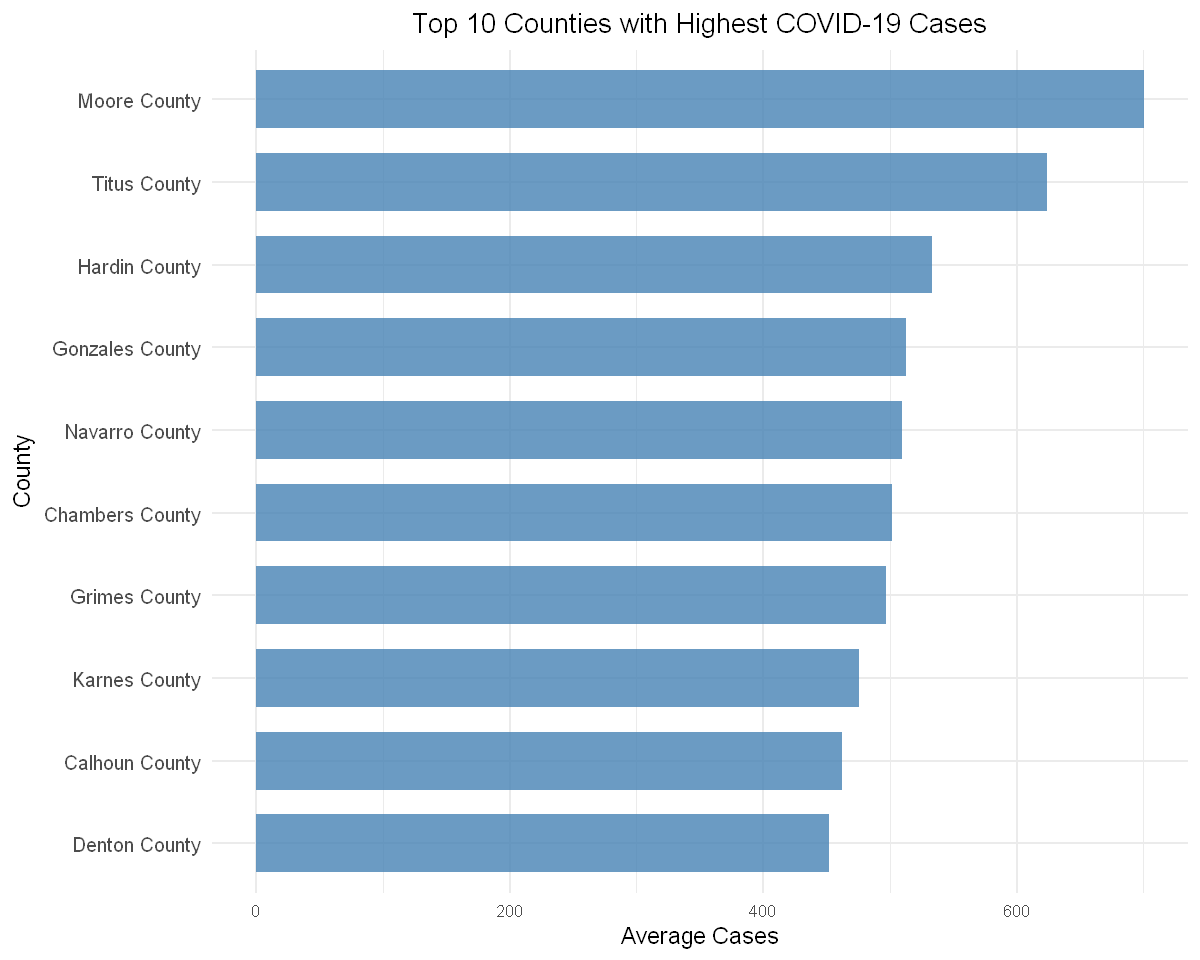

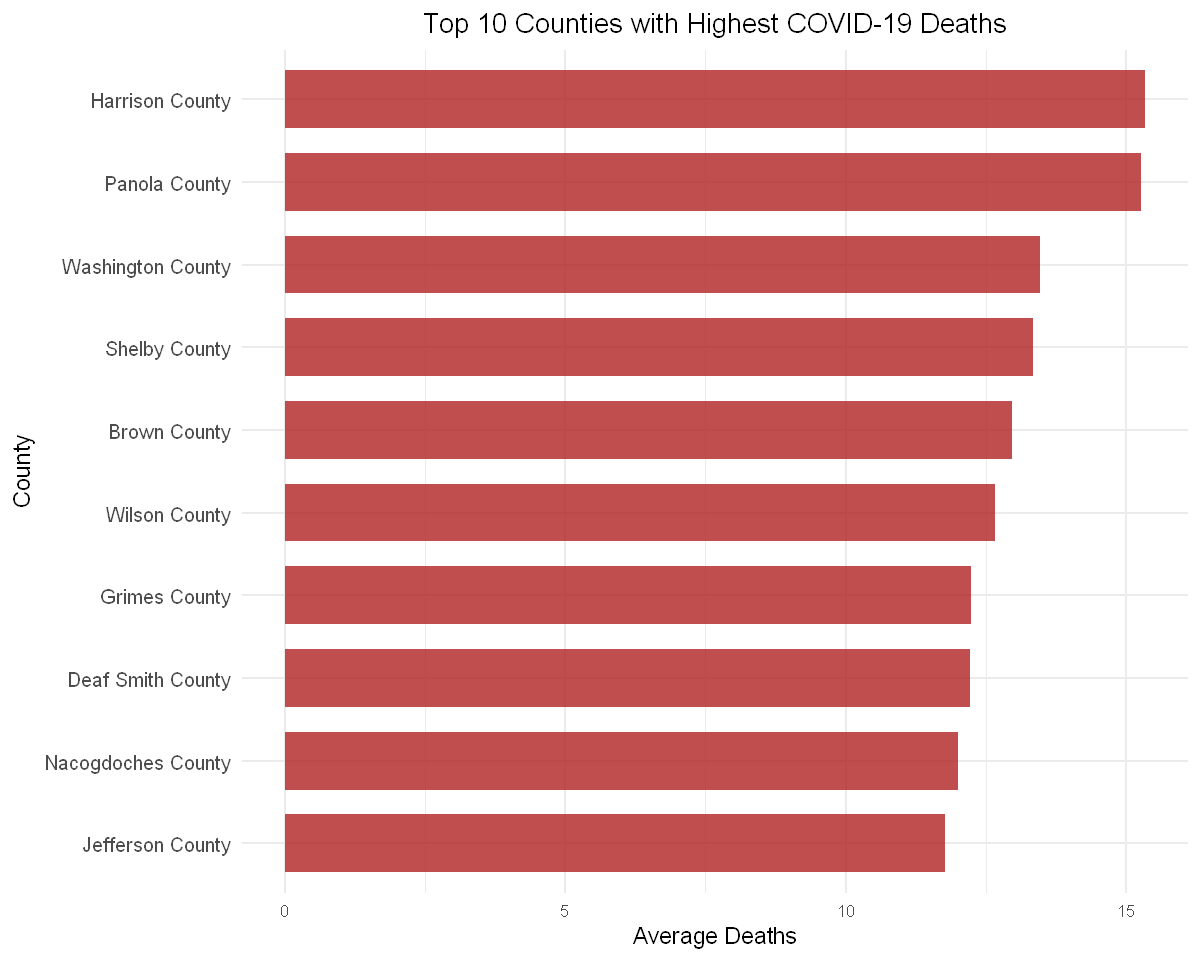

In [109]:
# Compute average cases and deaths per county
county_covid_summary <- covid_cases_tx_cleaned %>%
  group_by(county) %>%
  summarize(
    avg_cases = mean(cases, na.rm = TRUE),
    avg_deaths = mean(deaths, na.rm = TRUE)
  ) %>%
  arrange(desc(avg_cases))

# Select the top 10 counties with the highest cases
top_counties_cases <- county_covid_summary %>%
  slice_max(avg_cases, n = 10)

# Select the top 10 counties with the highest deaths
top_counties_deaths <- county_covid_summary %>%
  slice_max(avg_deaths, n = 10)

# Bar plot for highest COVID-19 cases
ggplot(top_counties_cases, aes(x = reorder(county, avg_cases), y = avg_cases)) +
  geom_col(fill = "steelblue", alpha = 0.8, width = 0.7) +
  coord_flip() +
  theme_minimal(base_size = 14) +
  labs(title = "Top 10 Counties with Highest COVID-19 Cases",
       x = "County", y = "Average Cases") +
  theme(plot.title = element_text(hjust = 0.5, size = 16),
        axis.text.y = element_text(size = 12),
        axis.text.x = element_text(size = 10))

# Bar plot for highest COVID-19 deaths
ggplot(top_counties_deaths, aes(x = reorder(county, avg_deaths), y = avg_deaths)) +
  geom_col(fill = "firebrick", alpha = 0.8, width = 0.7) +
  coord_flip() +
  theme_minimal(base_size = 14) +
  labs(title = "Top 10 Counties with Highest COVID-19 Deaths",
       x = "County", y = "Average Deaths") +
  theme(plot.title = element_text(hjust = 0.5, size = 16),
        axis.text.y = element_text(size = 12),
        axis.text.x = element_text(size = 10))

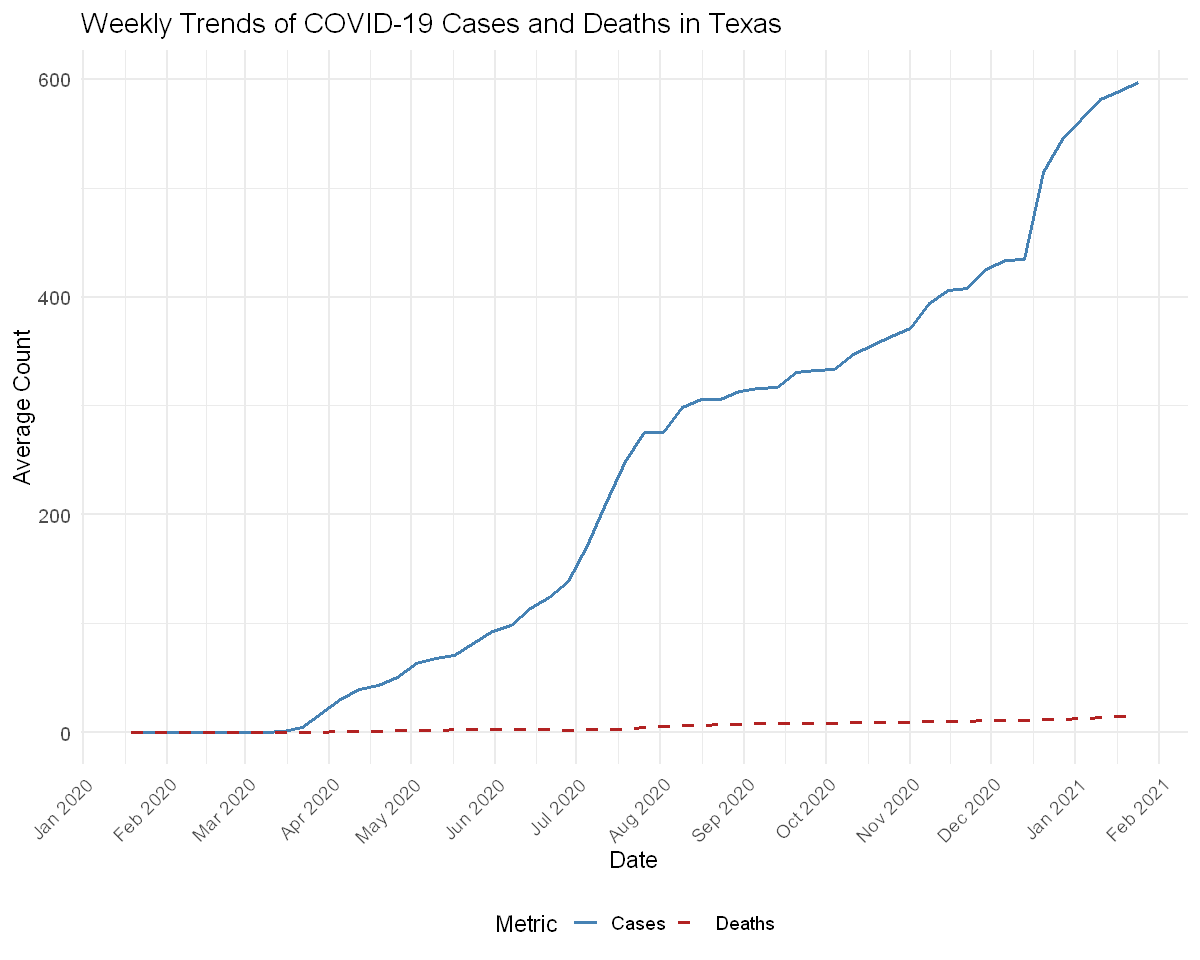

In [110]:
# Load necessary libraries

# Aggregate weekly case and death counts
covid_trends <- covid_cases_tx_cleaned %>%
  mutate(week = floor_date(date, "week")) %>%
  group_by(week) %>%
  summarize(
    avg_cases = mean(cases, na.rm = TRUE),
    avg_deaths = mean(deaths, na.rm = TRUE)
  ) %>%
  arrange(week)

# Line plot for cases and deaths over time
ggplot(covid_trends, aes(x = week)) +
  geom_line(aes(y = avg_cases, color = "Cases"), linewidth = 1) +
  geom_line(aes(y = avg_deaths, color = "Deaths"), linewidth = 1, linetype = "dashed") +
  theme_minimal(base_size = 14) +
  scale_color_manual(values = c("Cases" = "steelblue", "Deaths" = "firebrick")) +
  labs(
    title = "Weekly Trends of COVID-19 Cases and Deaths in Texas",
    x = "Date",
    y = "Average Count",
    color = "Metric"
  ) +
  theme(
    legend.position = "bottom",
    axis.text.x = element_text(angle = 45, hjust = 1)
  ) +
  scale_x_date(date_breaks = "1 month", date_labels = "%b %Y")

## Graduate-Level Analysis: by Leonardo Piedrahita

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


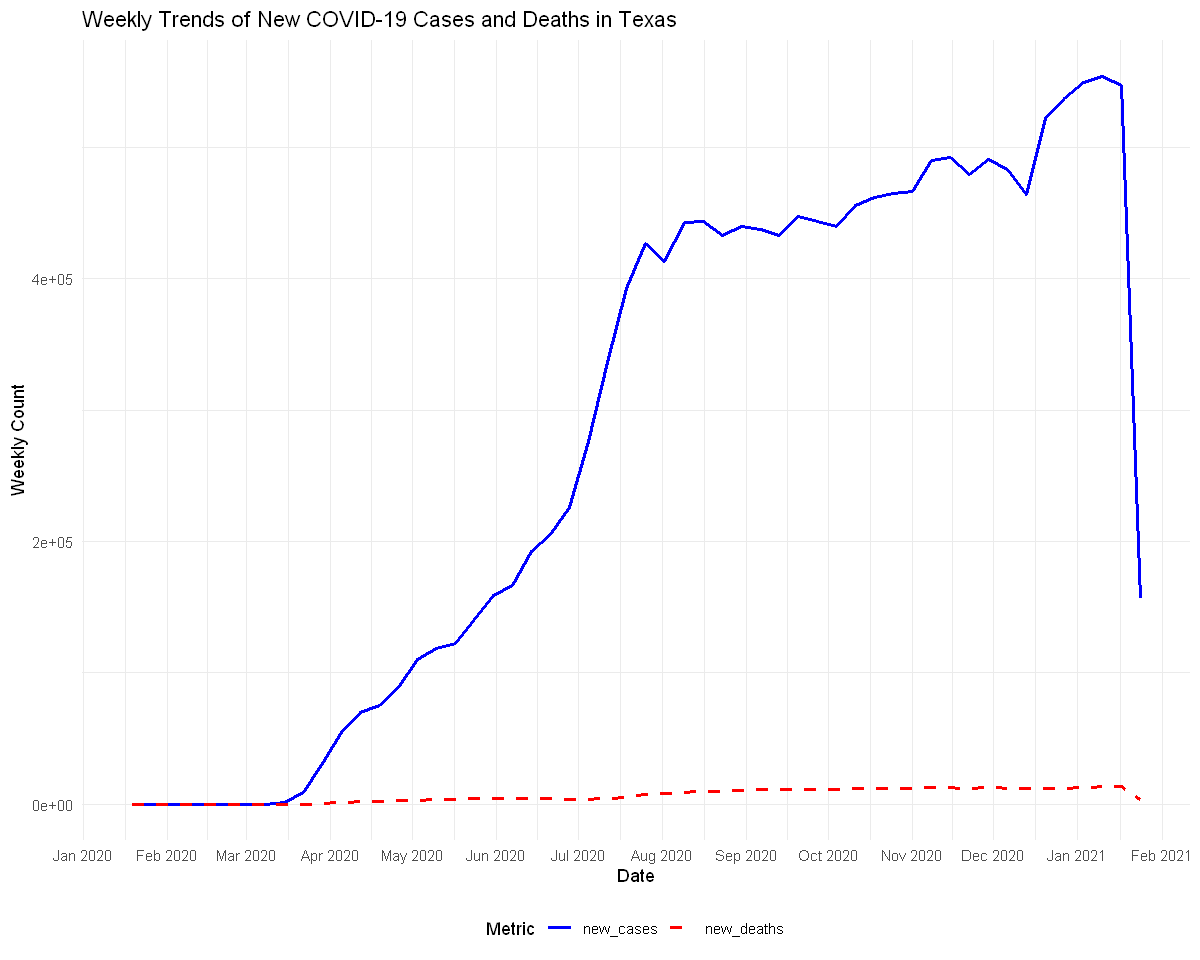

In [111]:
# Ensure date column is in Date format
covid_cases_tx_cleaned <- covid_cases_tx_cleaned %>%
  mutate(date = as.Date(date, format="%m/%d/%Y"))

# Aggregate new cases and deaths per week (instead of cumulative)
weekly_trends <- covid_cases_tx_cleaned %>%
  mutate(week = floor_date(date, "week")) %>%
  group_by(week) %>%
  summarize(
    new_cases = sum(cases, na.rm = TRUE),
    new_deaths = sum(deaths, na.rm = TRUE)
  ) %>%
  pivot_longer(cols = c(new_cases, new_deaths), 
               names_to = "metric", 
               values_to = "count")

# Plot new weekly trends (NOT cumulative)
ggplot(weekly_trends, aes(x = week, y = count, color = metric, linetype = metric)) +
  geom_line(size = 1) +
  scale_color_manual(values = c("new_cases" = "blue", "new_deaths" = "red")) +
  scale_linetype_manual(values = c("new_cases" = "solid", "new_deaths" = "dashed")) +
  labs(
    title = "Weekly Trends of New COVID-19 Cases and Deaths in Texas",
    x = "Date",
    y = "Weekly Count",
    color = "Metric",
    linetype = "Metric"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom") +
  scale_x_date(date_breaks = "1 month", date_labels = "%b %Y")


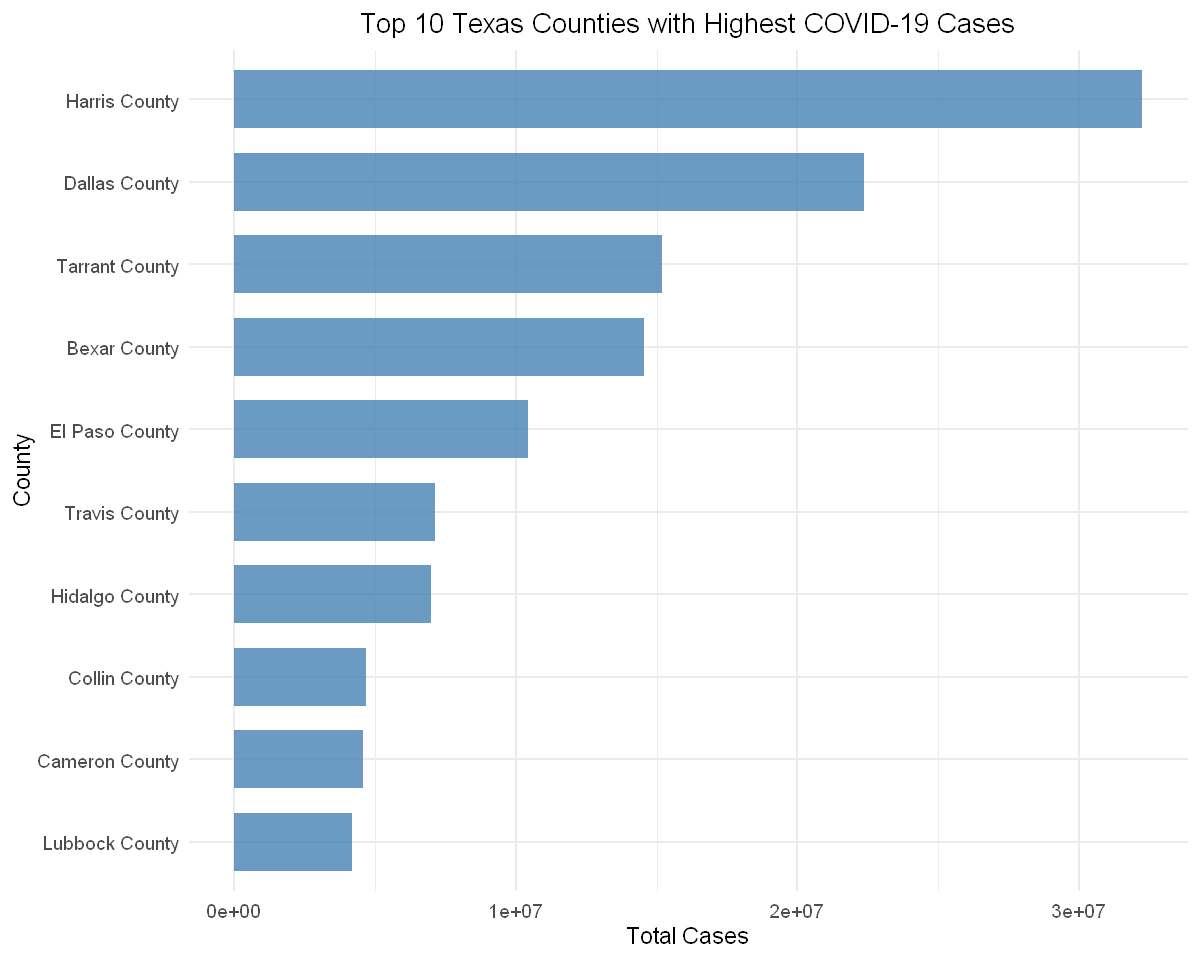

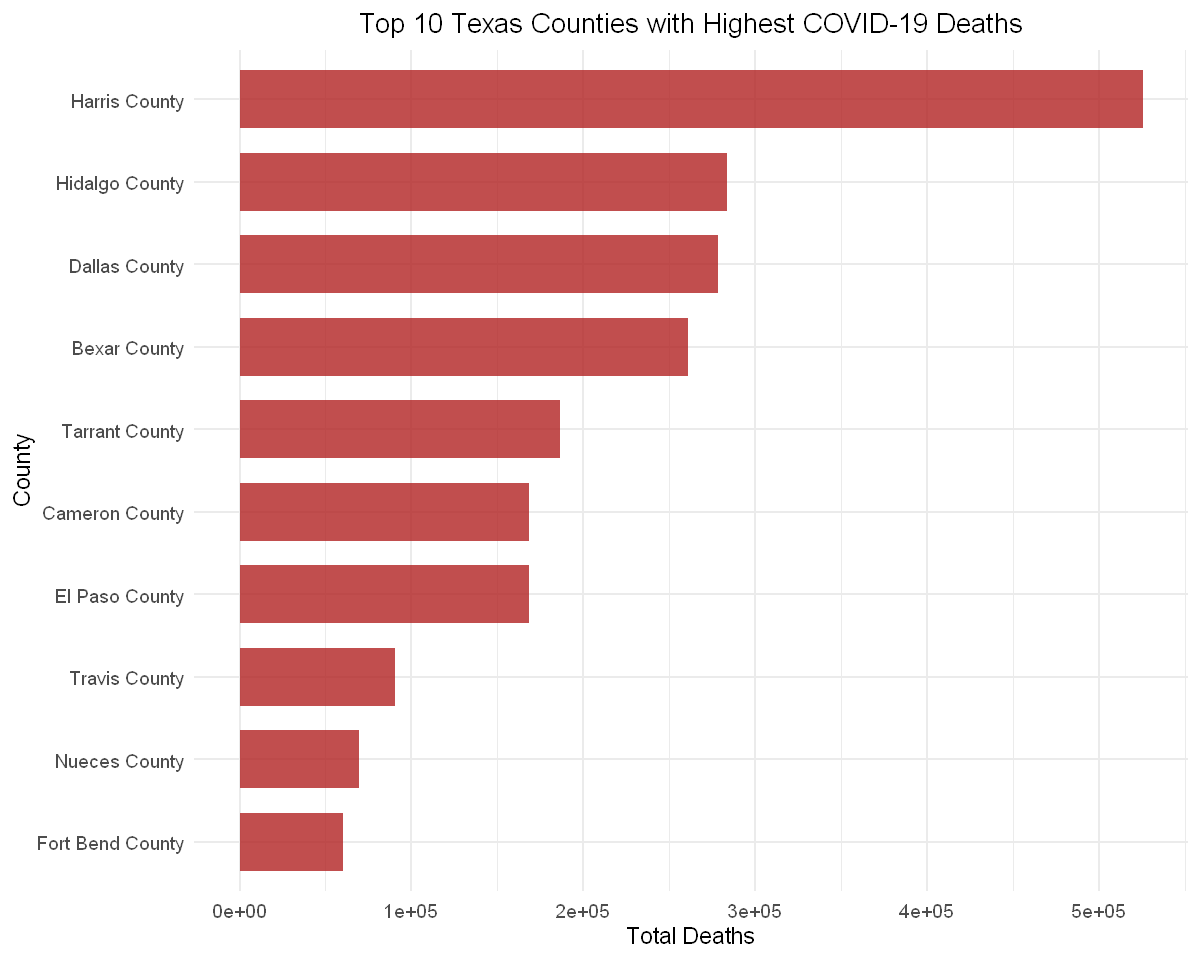

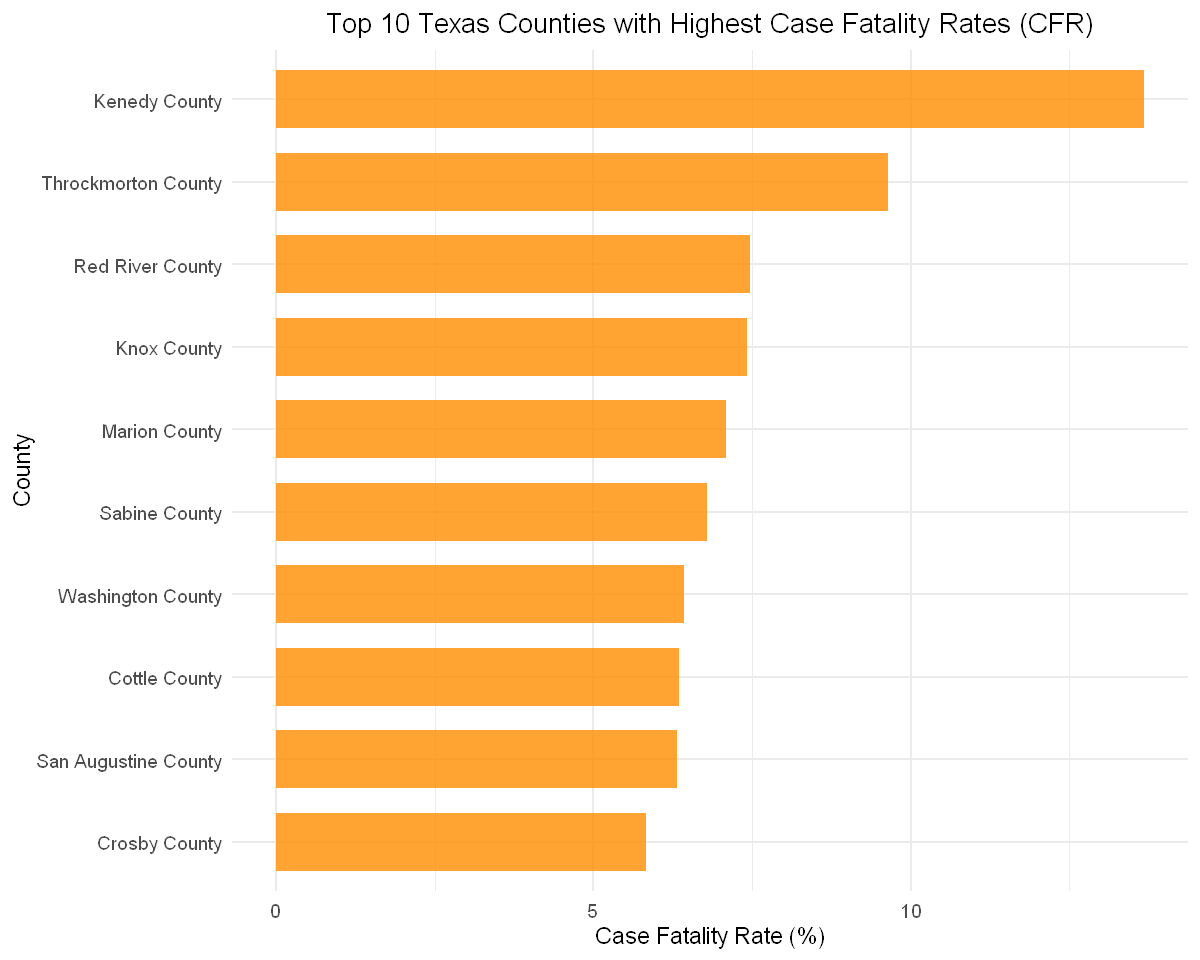

In [112]:
# Group data by county to compute total cases and deaths
county_summary <- covid_cases_tx %>%
  group_by(county) %>%
  summarize(
    total_cases = sum(cases, na.rm = TRUE),
    total_deaths = sum(deaths, na.rm = TRUE)
  ) %>%
  mutate(case_fatality_rate = (total_deaths / total_cases) * 100) %>%
  arrange(desc(total_cases))

# Top 10 counties with highest cases
top_cases <- county_summary %>%
  slice_max(total_cases, n = 10)

# Top 10 counties with highest deaths
top_deaths <- county_summary %>%
  slice_max(total_deaths, n = 10)

# Top 10 counties with highest case fatality rate (CFR)
top_cfr <- county_summary %>%
  filter(total_cases > 100) %>%  # Filter to avoid extreme outliers with very few cases
  slice_max(case_fatality_rate, n = 10)

# Bar plot for highest total cases
ggplot(top_cases, aes(x = reorder(county, total_cases), y = total_cases)) +
  geom_col(fill = "steelblue", alpha = 0.8, width = 0.7) +
  coord_flip() +
  theme_minimal(base_size = 14) +
  labs(title = "Top 10 Texas Counties with Highest COVID-19 Cases",
       x = "County", y = "Total Cases") +
  theme(plot.title = element_text(hjust = 0.5, size = 16))

# Bar plot for highest total deaths
ggplot(top_deaths, aes(x = reorder(county, total_deaths), y = total_deaths)) +
  geom_col(fill = "firebrick", alpha = 0.8, width = 0.7) +
  coord_flip() +
  theme_minimal(base_size = 14) +
  labs(title = "Top 10 Texas Counties with Highest COVID-19 Deaths",
       x = "County", y = "Total Deaths") +
  theme(plot.title = element_text(hjust = 0.5, size = 16))

# Bar plot for highest case fatality rates (CFR)
ggplot(top_cfr, aes(x = reorder(county, case_fatality_rate), y = case_fatality_rate)) +
  geom_col(fill = "darkorange", alpha = 0.8, width = 0.7) +
  coord_flip() +
  theme_minimal(base_size = 14) +
  labs(title = "Top 10 Texas Counties with Highest Case Fatality Rates (CFR)",
       x = "County", y = "Case Fatality Rate (%)") +
  theme(plot.title = element_text(hjust = 0.5, size = 16))

In [113]:
# Filter out "Statewide Unallocated" and aggregate by county
county_agg <- covid_cases_tx %>%
  filter(county != "Statewide Unallocated") %>% 
  group_by(county) %>%                          
  summarize(
    total_cases = max(cases, na.rm = TRUE),     
    total_deaths = max(deaths, na.rm = TRUE)
  ) %>%
  filter(!is.na(total_cases) & !is.na(total_deaths) & total_cases > 0)  # Remove NA and zero-case counties

# Quick check of the data
head(county_agg)

county,total_cases,total_deaths
<fct>,<dbl>,<dbl>
Anderson County,5724,84
Andrews County,1630,37
Angelina County,6857,206
Aransas County,935,29
Archer County,733,10
Armstrong County,135,6


In [114]:
# Correlation matrix for cases and deaths
cc <- county_agg %>%
  select(total_cases, total_deaths) %>%
  cor(use = "complete.obs")
print("Correlation Matrix:")
print(cc)

[1] "Correlation Matrix:"
             total_cases total_deaths
total_cases    1.0000000    0.9519214
total_deaths   0.9519214    1.0000000


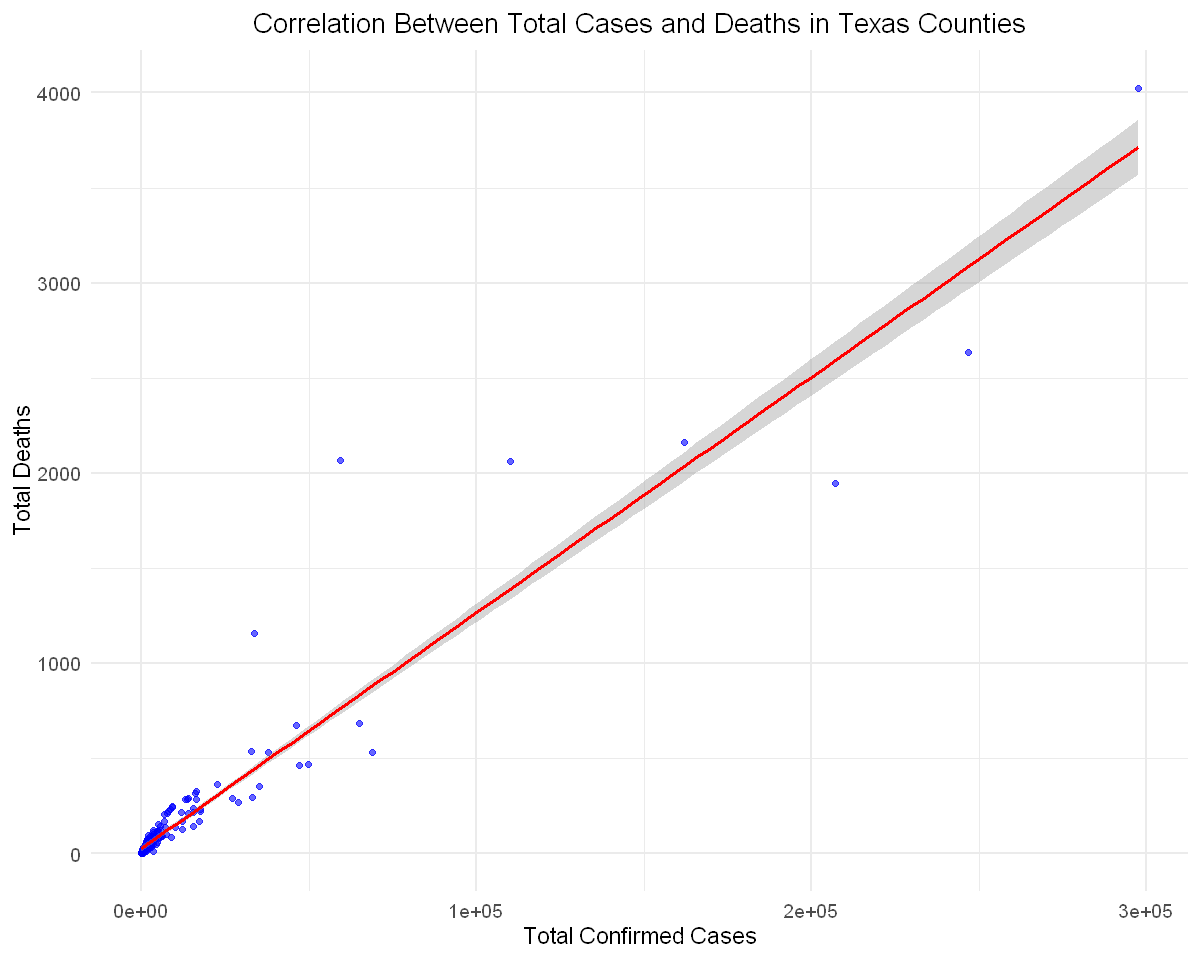

In [115]:
library(ggplot2)

ggplot(county_agg, aes(x = total_cases, y = total_deaths)) +
  geom_point(color = "blue", alpha = 0.6) +
  geom_smooth(method = "lm", formula = y ~ x, color = "red", se = TRUE) +
  theme_minimal(base_size = 14) +
  labs(title = "Correlation Between Total Cases and Deaths in Texas Counties",
       x = "Total Confirmed Cases", y = "Total Deaths") +
  theme(plot.title = element_text(hjust = 0.5, size = 16))

In [116]:
# Run the correlation test
cor_test_result <- with(county_agg, cor.test(total_cases, total_deaths))

# Print the results
print("Correlation Test Result:")
print(cor_test_result)

[1] "Correlation Test Result:"

	Pearson's product-moment correlation

data:  total_cases and total_deaths
t = 49.328, df = 252, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9388375 0.9622609
sample estimates:
      cor 
0.9519214 




	Pearson's product-moment correlation

data:  total_cases and total_deaths
t = 49.328, df = 252, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9388375 0.9622609
sample estimates:
      cor 
0.9519214 



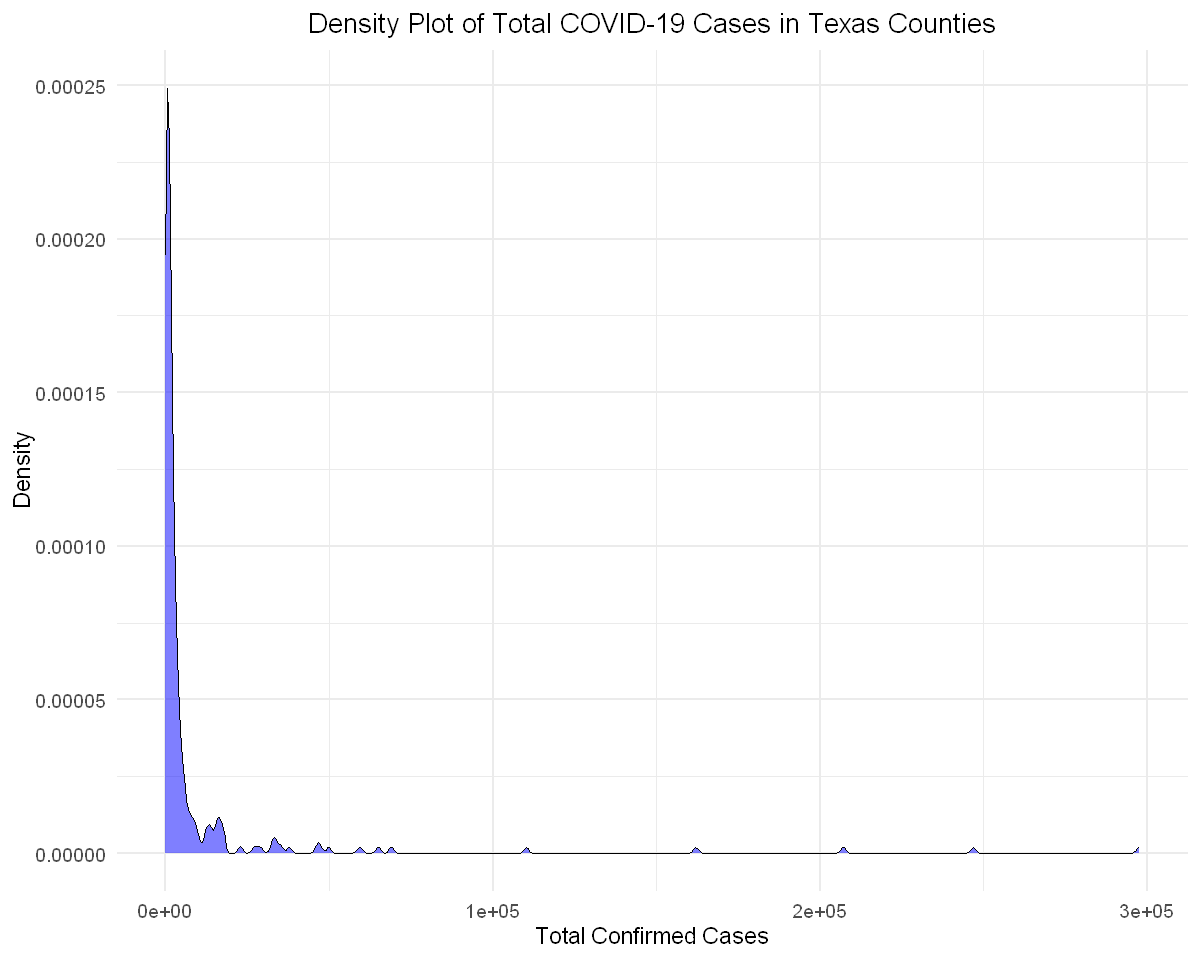

In [117]:
# Create a density plot for total_cases
ggplot(county_agg, aes(x = total_cases)) +
  geom_density(fill = "blue", alpha = 0.5) +
  theme_minimal(base_size = 14) +
  labs(title = "Density Plot of Total COVID-19 Cases in Texas Counties",
       x = "Total Confirmed Cases",
       y = "Density") +
  theme(plot.title = element_text(hjust = 0.5, size = 16))